<a href="https://colab.research.google.com/github/S-aakash21/ML_projects/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate Python code to perform a Linear Regression task using the dataset from "/content/Netflix TV Shows and Movies.csv", including data loading, preprocessing, model training, and evaluation.

## Load data

### Subtask:
Load the data from the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the data into a pandas DataFrame and display the first few rows.



In [10]:
import pandas as pd

df = pd.read_csv('/content/Netflix TV Shows and Movies.csv')
display(df.head())

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0


## Explore and preprocess data

### Subtask:
Examine the data for missing values, outliers, and understand the data types of different columns. Clean and preprocess the data as needed for linear regression. This might involve handling missing values, encoding categorical variables, and selecting relevant features.


**Reasoning**:
Examine the data for missing values, outliers, and understand the data types of different columns. Clean and preprocess the data as needed for linear regression.



In [11]:
import pandas as pd

# Reload the DataFrame to ensure original columns are present
df = pd.read_csv('/content/Netflix TV Shows and Movies.csv')

df.info()
display(df.describe())
display(df.isnull().sum())

# Handle missing values in relevant columns.
# For 'runtime', 'imdb_score', 'imdb_votes', we will fill missing numerical values with the mean.
numerical_cols_to_fill = ['runtime', 'imdb_score', 'imdb_votes']
for col in numerical_cols_to_fill:
    df[col] = df[col].fillna(df[col].mean())

# For 'age_certification', which is categorical, fill with mode before one-hot encoding
if 'age_certification' in df.columns:
    df['age_certification'] = df['age_certification'].fillna(df['age_certification'].mode()[0])


# Identify and handle potential outliers in numerical columns.
# Using IQR method for outlier detection and capping.
for col in numerical_cols_to_fill:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


# Encode categorical variables using an appropriate technique for linear regression.
# We will use one-hot encoding for 'type' and 'age_certification'.
# Check if 'type' and 'age_certification' columns exist before encoding
cols_to_encode = [col for col in ['type', 'age_certification'] if col in df.columns]
if cols_to_encode:
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)


# Select relevant features for the linear regression model based on the analysis.
# We will drop columns that are not suitable for linear regression or are redundant.
# 'index', 'id', 'title', 'description', 'imdb_id' are dropped.
cols_to_drop = ['index', 'id', 'title', 'description', 'imdb_id']
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)


display(df.head())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


,0
index,0
id,0
title,0
type,0
description,5
release_year,0
age_certification,2285
runtime,0
imdb_id,0
imdb_score,0


,release_year,runtime,imdb_score,imdb_votes,type_SHOW,age_certification_NC-17,age_certification_PG,age_certification_PG-13,age_certification_R,age_certification_TV-14,age_certification_TV-G,age_certification_TV-MA,age_certification_TV-PG,age_certification_TV-Y,age_certification_TV-Y7
0,1976,113.0,8.3,24907.0,False,False,False,False,True,False,False,False,False,False,False
1,1975,91.0,8.2,24907.0,False,False,True,False,False,False,False,False,False,False,False
2,1979,94.0,8.0,24907.0,False,False,False,False,True,False,False,False,False,False,False
3,1973,133.0,8.1,24907.0,False,False,False,False,True,False,False,False,False,False,False
4,1969,30.0,8.8,24907.0,True,False,False,False,False,True,False,False,False,False,False


,0
release_year,0
runtime,0
imdb_score,0
imdb_votes,0
type_SHOW,0
age_certification_NC-17,0
age_certification_PG,0
age_certification_PG-13,0
age_certification_R,0
age_certification_TV-14,0


**Reasoning**:
The previous attempt to drop columns failed because some columns were not present in the dataframe. I will fix this by only dropping the columns that exist in the dataframe.



In [12]:
# This cell is no longer needed as the column dropping is handled in the previous cell.

## Define features and target variable

### Subtask:
Identify the independent variables (features) and the dependent variable (target) for the linear regression model.


**Reasoning**:
Define the features and the target variable for the linear regression model.



In [13]:
# Identify the actual columns in the dataframe after one-hot encoding
# The columns related to 'type' should be 'type_SHOW' if it exists.
# The columns related to 'age_certification' should be those starting with 'age_certification_'
# excluding the original 'age_certification' column which was dropped.

# Get all columns that start with 'type_'
type_cols = [col for col in df.columns if col.startswith('type_')]
# Get all columns that start with 'age_certification_'
age_certification_cols = [col for col in df.columns if col.startswith('age_certification_')]

# Combine the original numerical features with the new one-hot encoded columns
features = ['release_year', 'runtime', 'imdb_votes'] + type_cols + age_certification_cols
target = 'imdb_score'

print("Features selected:", features)
print("Target variable:", target)

Features selected: ['release_year', 'runtime', 'imdb_votes', 'type_SHOW', 'age_certification_NC-17', 'age_certification_PG', 'age_certification_PG-13', 'age_certification_R', 'age_certification_TV-14', 'age_certification_TV-G', 'age_certification_TV-MA', 'age_certification_TV-PG', 'age_certification_TV-Y', 'age_certification_TV-Y7']
Target variable: imdb_score


## Split data

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the preprocessed data into training and testing sets using the defined features and target.



In [14]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4226, 14)
Shape of X_test: (1057, 14)
Shape of y_train: (4226,)
Shape of y_test: (1057,)


**Reasoning**:
The previous code failed because some of the specified features were not present in the dataframe after preprocessing. I need to identify the actual columns that resulted from one-hot encoding and update the `features` list accordingly before splitting the data.



In [15]:
# Identify the actual columns in the dataframe after one-hot encoding
# The columns related to 'type' should be 'type_SHOW' and 'type_MOVIE' if both exist.
# The columns related to 'age_certification' should be those starting with 'age_certification_'
# excluding the original 'age_certification' column which was dropped.

# Get all columns that start with 'type_'
type_cols = [col for col in df.columns if col.startswith('type_')]
# Get all columns that start with 'age_certification_'
age_certification_cols = [col for col in df.columns if col.startswith('age_certification_')]

# Combine the original numerical features with the new one-hot encoded columns
features = ['release_year', 'runtime', 'imdb_votes'] + type_cols + age_certification_cols
target = 'imdb_score'

# Now split the data using the corrected features list
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4226, 14)
Shape of X_test: (1057, 14)
Shape of y_train: (4226,)
Shape of y_test: (1057,)


## Train the model

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Train a linear regression model on the training data using the steps outlined in the instructions.



In [16]:
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression object
model = LinearRegression()

# Fit the instantiated model to the training data
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared.


**Reasoning**:
Evaluate the trained model's performance on the testing data using appropriate metrics.



In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 1.0693375096156619
Root Mean Squared Error (RMSE): 1.0340877668823192
R-squared (R2) Score: 0.18179944085030242


## Visualize results

### Subtask:
Visualize the model's predictions against the actual values, or visualize the coefficients of the linear regression model to understand feature importance.


**Reasoning**:
Create a scatter plot to visualize the actual vs. predicted values and add a diagonal line for comparison.



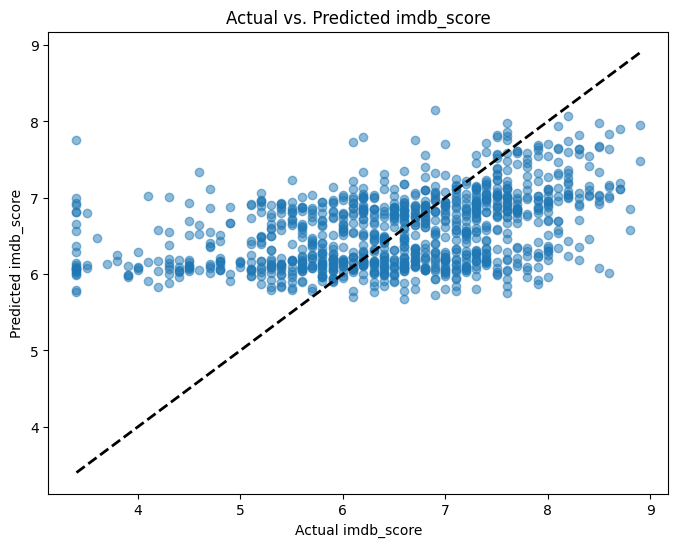

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line for perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Add labels and title
plt.xlabel('Actual imdb_score')
plt.ylabel('Predicted imdb_score')
plt.title('Actual vs. Predicted imdb_score')

# Display the plot
plt.show()